# PIMA Indian

**Anirudh Roy**

**19BCS6136**

## Problem Statement

Take the Pima Indian Diabetes dataset which contains information about the several medical predictor variables of patients. The target column is "Outcome". Use Naïve Bayes to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Optimise the evaluated results using 10-fold cross validation.

# 1. Collect and understand the data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes = True)

In [3]:
pima = pd.read_csv('diabetes.csv')

In [4]:
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
pima.shape

(768, 9)

In [7]:
pima.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Above also shows that 768 entries and 9 columns.

There are no null values in any of the variable.

But there are values for some columns which does not make sense; they are marked as a zero (0) value

In [9]:
pima.isnull().values.any()

False

In [10]:
pima.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [12]:
pima['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Text(0, 0.5, 'Number of People')

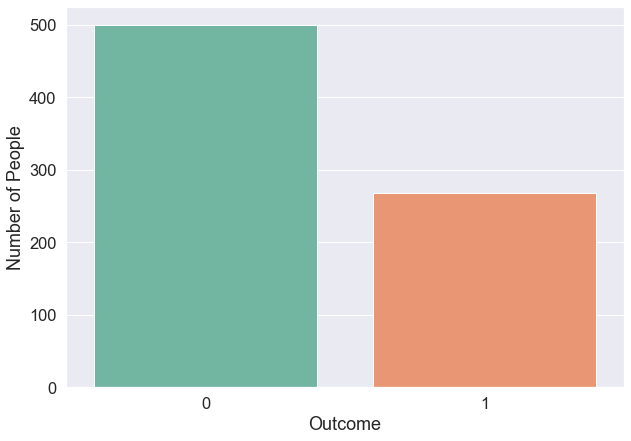

In [14]:
plt.figure(figsize=(10,7))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Outcome', data=pima, palette="Set2")
plt.ylabel('Number of People')

We can see from above plot that:

People who do not have diabetes: 500

People who have diabetes : 268

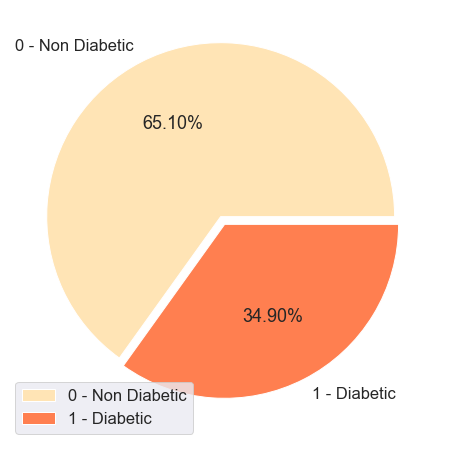

In [15]:
plt.figure(figsize=(8,8))
pieC = pima['Outcome'].value_counts()
explode = (0.05, 0)
colors = ['moccasin', 'coral']
labels = ['0 - Non Diabetic', '1 - Diabetic']
sns.set(font_scale = 1.5)
plt.pie(pieC, labels = ('0 - Non Diabetic', '1 - Diabetic'), autopct = "%.2f%%", explode = explode, colors = colors)
plt.legend(labels, loc = 'lower left')

We can see from above pie plot that:

65.10% out of 768 Pima Indian women do not have diabetes

34.90% out of 768 Pima Indian women have diabetes

# 2.Exploratory Data Analysis (EDA)

There are variables that have a minimum value of zero (0).

On some variables, a value of zero does not make sense and thus indicates missing value.

Replace zero (0) values with NaN values and then sum the NaN values in each column to know get count of NaN values

In [16]:
pima_copy = pima.copy(deep = True)

In [18]:
pima_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = pima_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
print(pima_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

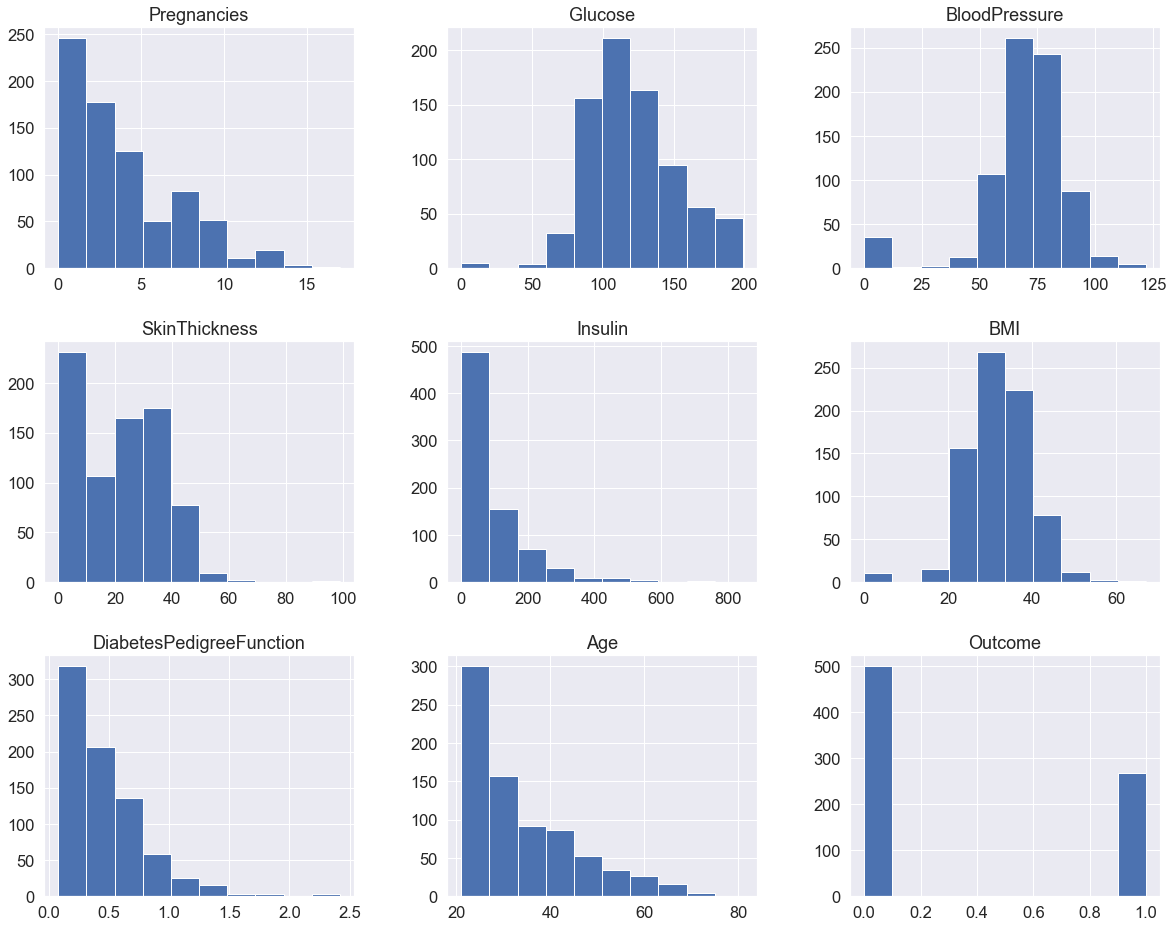

In [19]:
pima.hist(figsize = (20,16),grid=True)

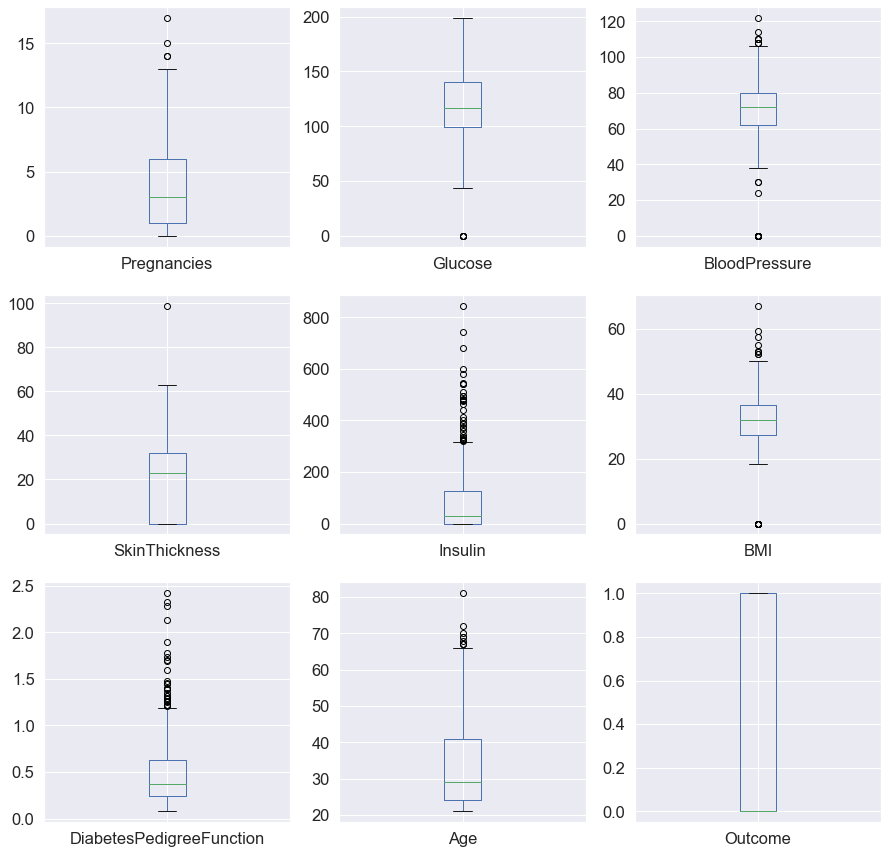

In [20]:
pima.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,15))
sns.set(font_scale = 1.5)

# 3. DATA CLEANING

Let us check how data is distributed for variables that have an invalid zero value

See if there are any outliers

See if data is normally distributed, left skewed or right skewed

<AxesSubplot:xlabel='Glucose', ylabel='Density'>

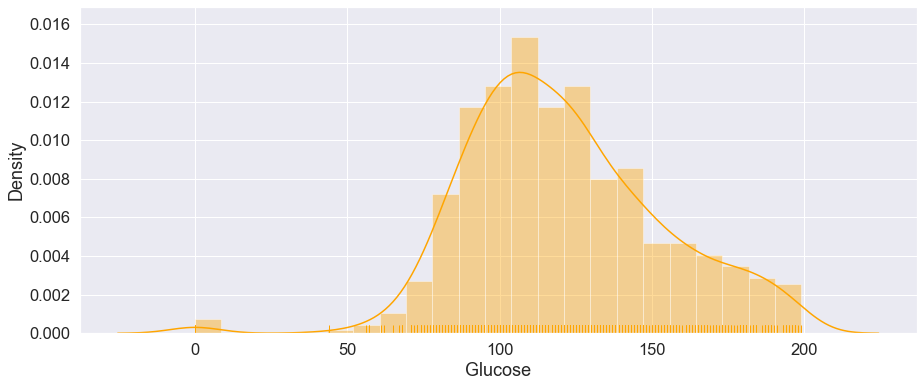

In [21]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.distplot(pima['Glucose'], kde = True, rug = True, color = 'orange')

<AxesSubplot:xlabel='Glucose'>

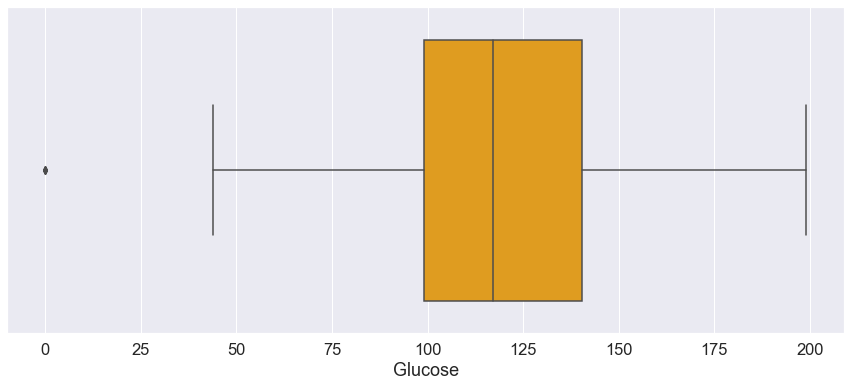

In [22]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.boxplot(pima.Glucose, color = 'orange')

<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

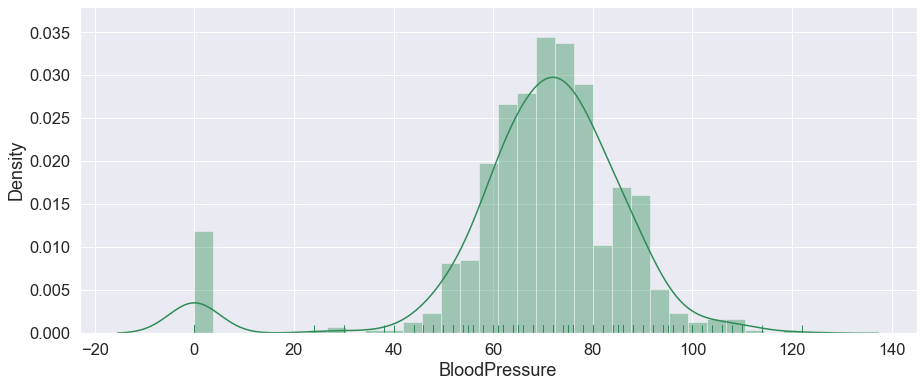

In [23]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.distplot(pima['BloodPressure'], kde = True, rug = True, color = 'seagreen')

<AxesSubplot:xlabel='BloodPressure'>

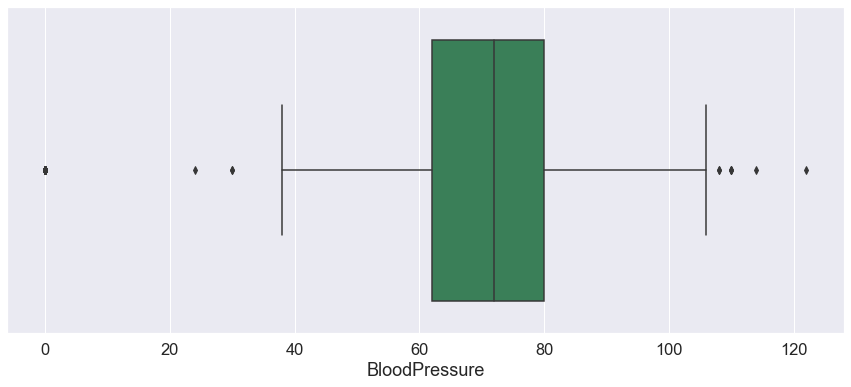

In [24]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.boxplot(pima.BloodPressure, color = 'seagreen')

<AxesSubplot:xlabel='SkinThickness', ylabel='Density'>

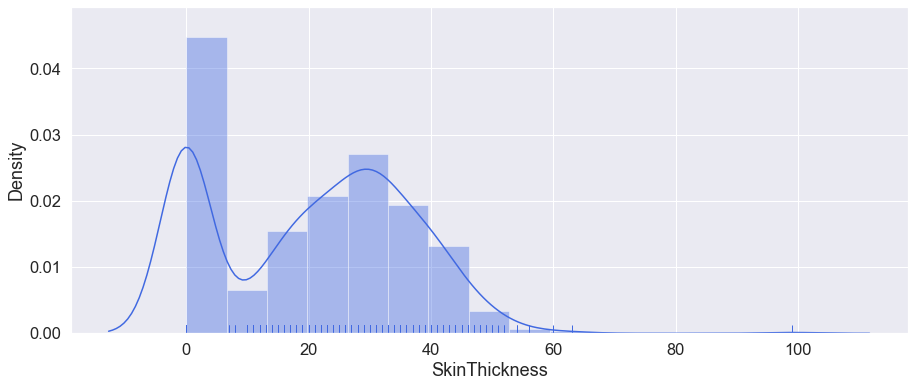

In [25]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.distplot(pima['SkinThickness'], kde = True, rug = True, color = 'royalblue')

<AxesSubplot:xlabel='SkinThickness'>

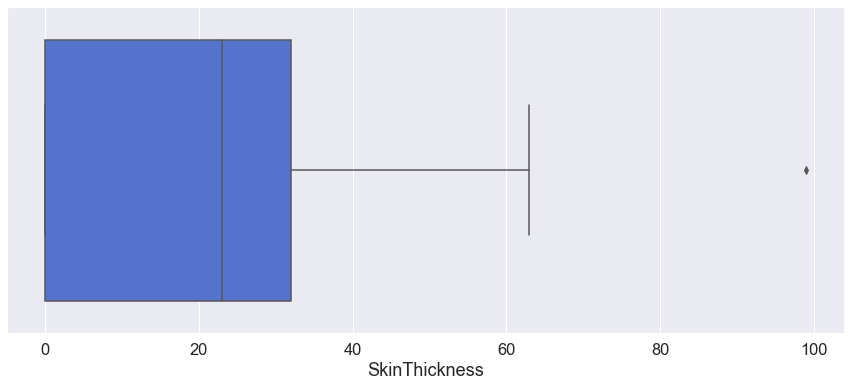

In [26]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.boxplot(pima.SkinThickness, color = 'royalblue')

skin' [SkinThickness] has 227 zero invalid values that is why lower limit and Q1 (25th) quartile are same

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

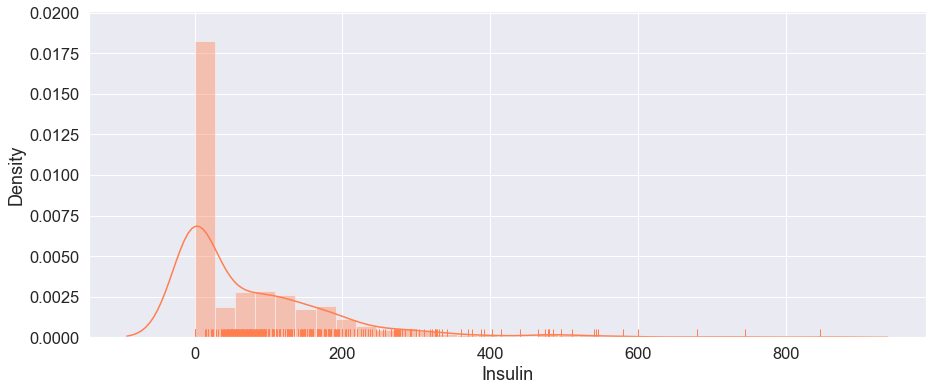

In [27]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.distplot(pima['Insulin'], kde = True, rug = True, color = 'coral')

<AxesSubplot:xlabel='Insulin'>

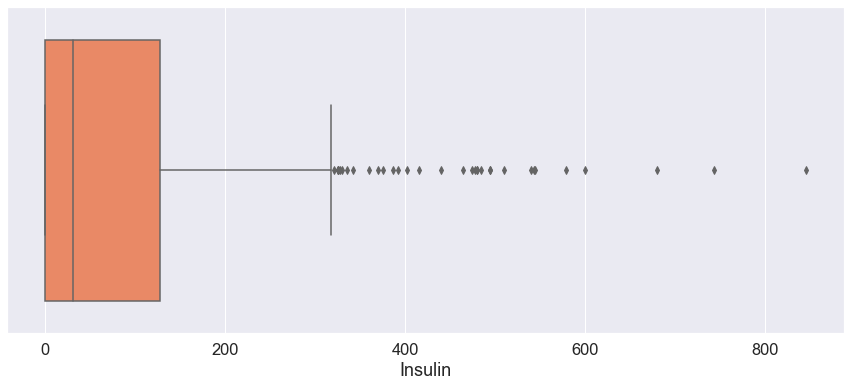

In [28]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.boxplot(pima.Insulin, color = 'coral')

Insulin has 374 zero invalid values that is why lower limit and Q1 (25th) quartile are same

Also there are many outliers

<AxesSubplot:xlabel='BMI', ylabel='Density'>

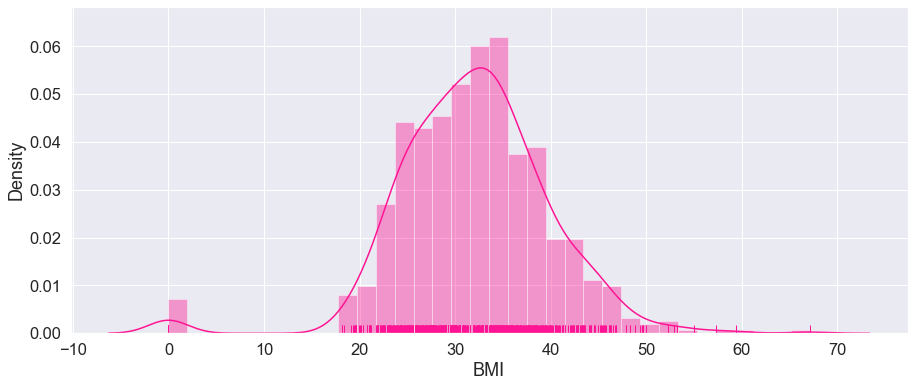

In [29]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.distplot(pima['BMI'], kde = True, rug = True, color = 'deeppink')

<AxesSubplot:xlabel='BMI'>

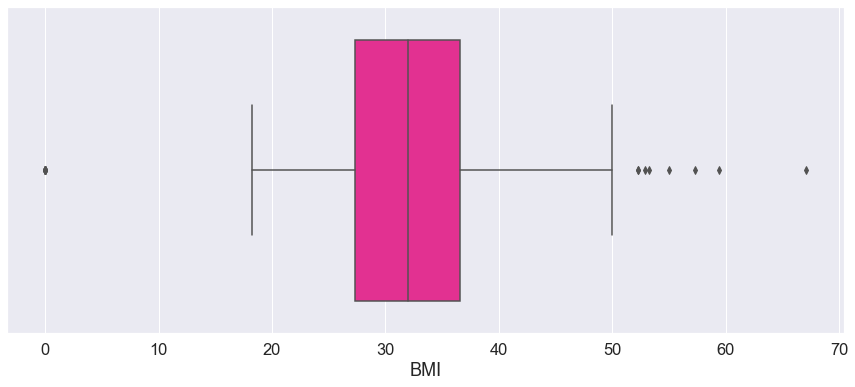

In [30]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.boxplot(pima.BMI, color = 'deeppink')

Replace NaN (earlier we replaced 0s with NaN in pima_copy dataframe) with Median or Mean

Variables Glucose and BloodPressure do not have much outliers and we need to fill little data so we will use mean here

Variables SkinThickness, Insulin, and BMI have much disparity and we need to fill more data so we will use median here

In [31]:
pima_copy['Glucose'].fillna(pima_copy['Glucose'].mean(), inplace = True)

In [33]:
pima_copy['BloodPressure'].fillna(pima_copy['BloodPressure'].mean(), inplace = True)

In [35]:
pima_copy['SkinThickness'].fillna(pima_copy['SkinThickness'].median(), inplace = True)
pima_copy['Insulin'].fillna(pima_copy['Insulin'].median(), inplace = True)
pima_copy['BMI'].fillna(pima_copy['BMI'].median(), inplace = True)

In [36]:
print(pima_copy.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Data is cleaned now!

In [37]:
corr = pima_copy.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


<AxesSubplot:>

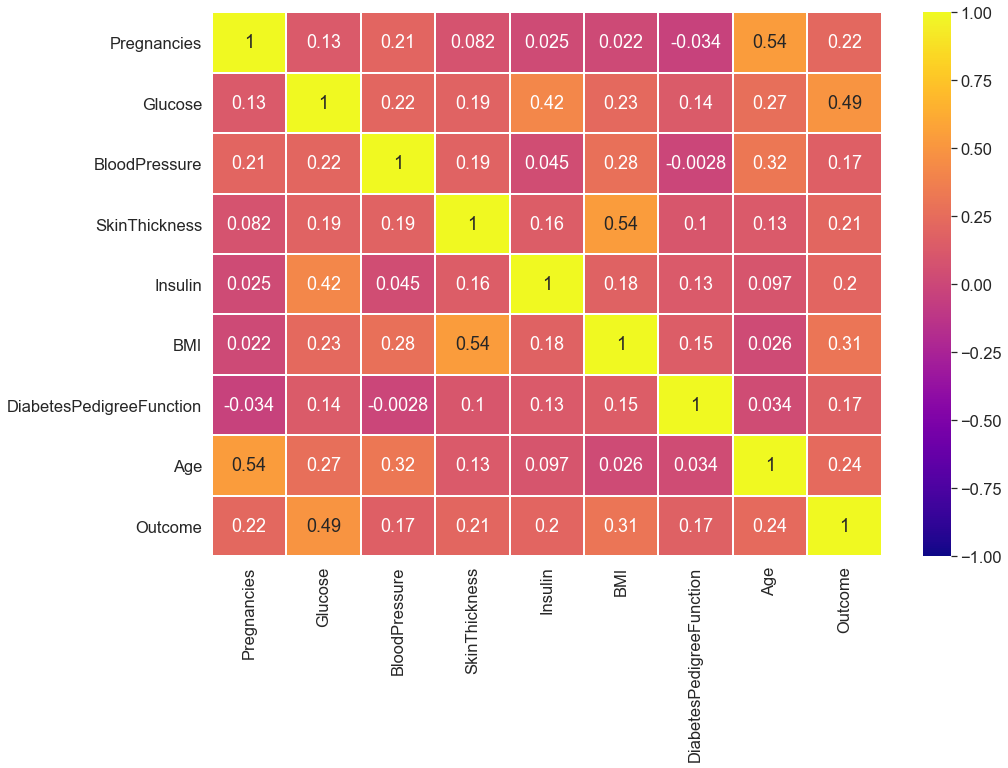

In [38]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.heatmap(corr, annot = True, cmap = 'plasma', vmin = -1, vmax = 1, linecolor='white', linewidths= 1)

From above heatmap, we can conclude following:

1.There is no feature variable that has strong correlation with target Outcome as there is no +0.70 which indicates a strong uphill (positive) linear relationship

2.Best predictor of target variable Outcome is Glucose --> 0.49 which is near to 0.50 which indicates a moderate uphill (positive) relationship

3.Second best predictor of target variable Outcome is BMI --> 0.31 which indicates a weak uphill (positive) linear relationship

4.Correlation between BMI and SkinThickness is 0.54 which indicates BMI increases with increase in Skin Thickness

5.Correlation between Age and Pregnancies is 0.54 which indicates increase in age increases chances of having a child

6.All the variables look to be uncorrelated. So we cannot eliminate any variable just by looking at the correlation matrix

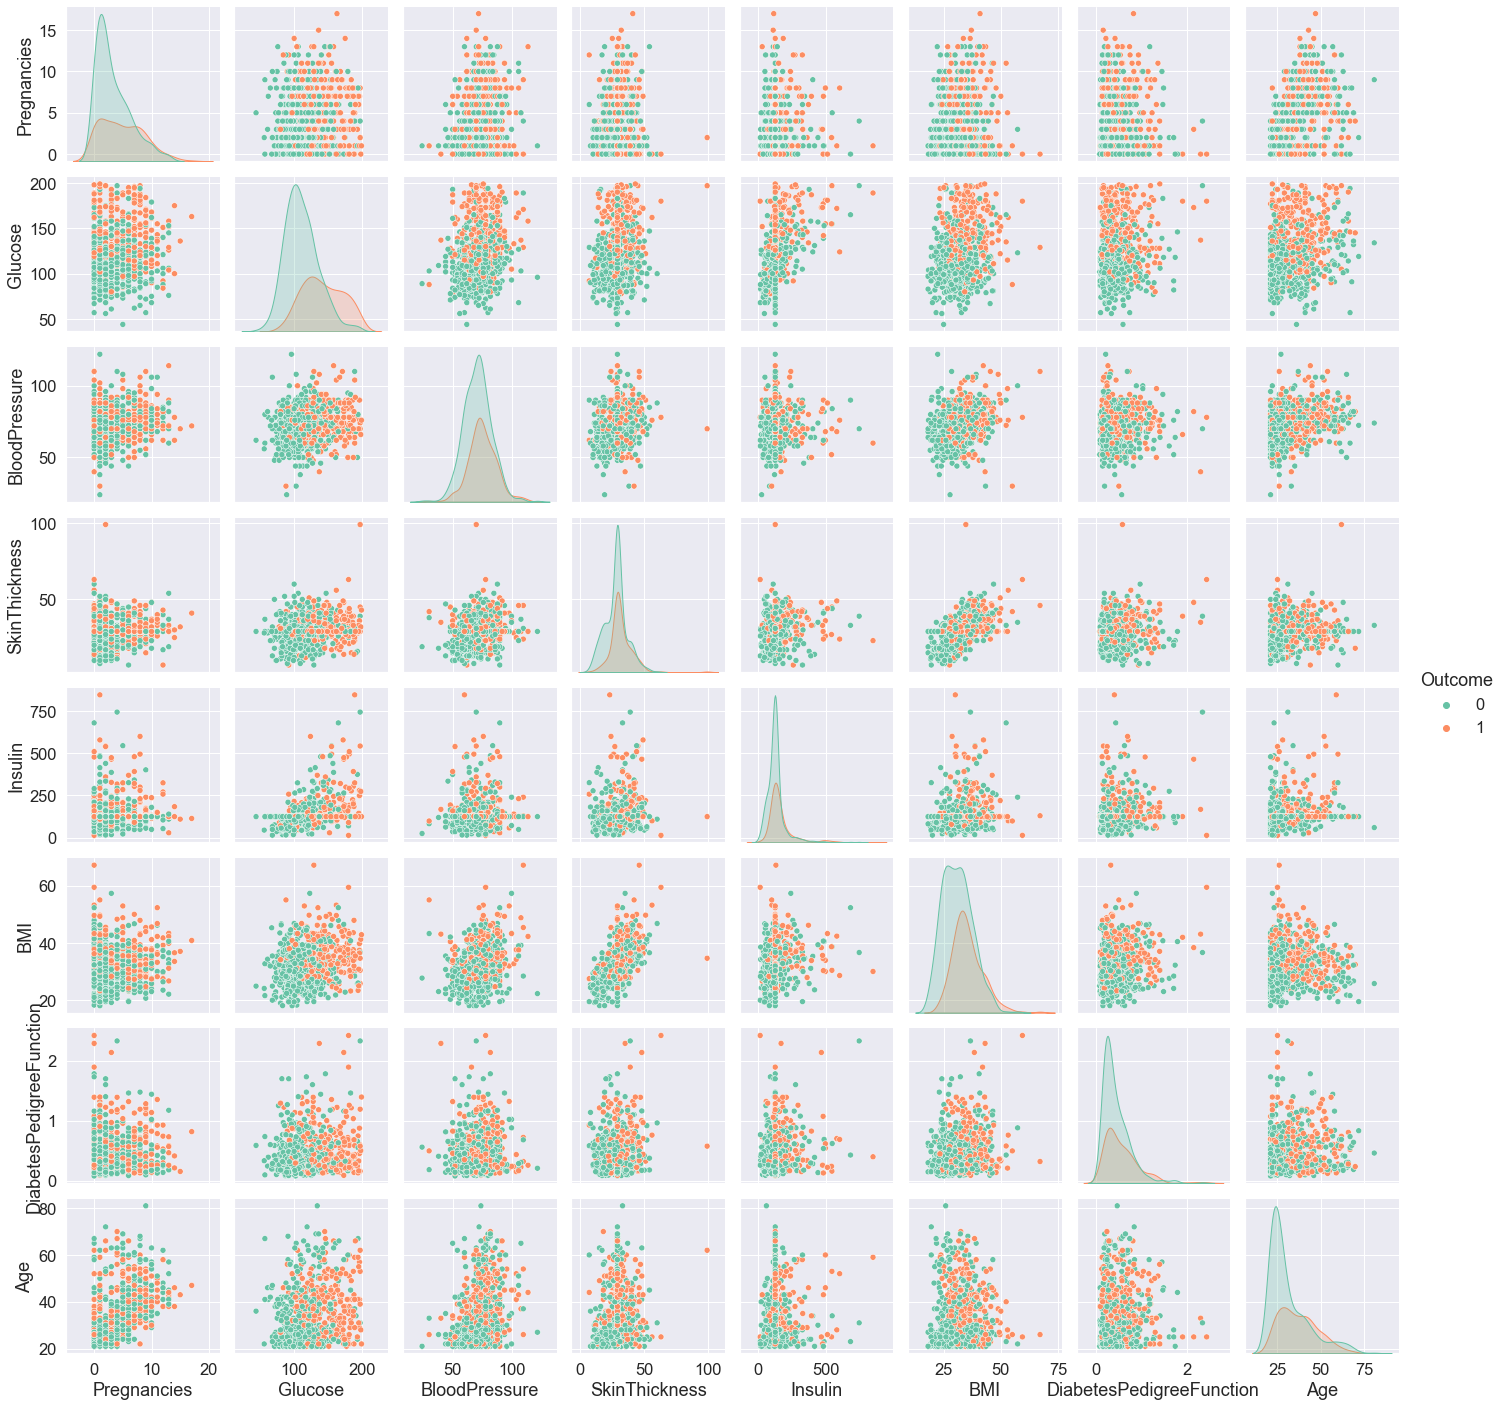

In [40]:
sns.set(font_scale = 1.5)
sns.pairplot(data = pima_copy, hue = 'Outcome', diag_kind = 'kde', palette = 'Set2')

# 4. Build a Model using Naive Bayes Classifier

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import metrics , model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [42]:
from sklearn.model_selection import train_test_split
X = pima_copy.drop('Outcome', axis  = 1)
y = pima_copy['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 17)

In [43]:
nbModel = GaussianNB()

In [44]:
nbModel.fit(X_train, y_train)

GaussianNB()

In [45]:
nb_y_pred = nbModel.predict(X_test)

In [46]:
nbConfusion = metrics.confusion_matrix(y_test, nb_y_pred)
nbConfusion

array([[124,  26],
       [ 34,  47]], dtype=int64)

<AxesSubplot:>

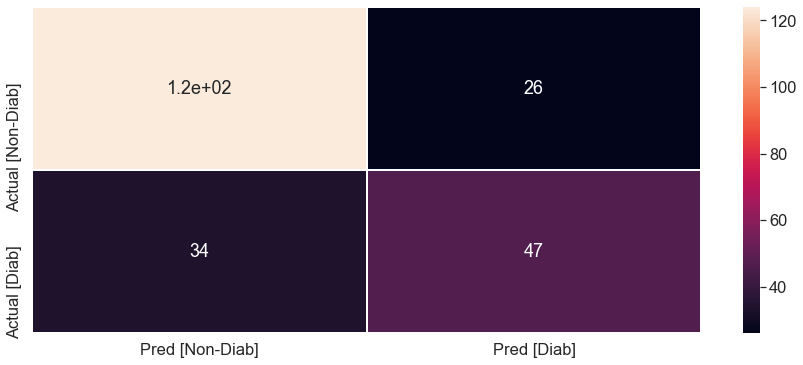

In [47]:
ylabel = ["Actual [Non-Diab]","Actual [Diab]"]
xlabel = ["Pred [Non-Diab]","Pred [Diab]"]
#sns.set(font_scale = 1.5)
plt.figure(figsize=(15,6))
sns.heatmap(nbConfusion, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='white', linewidths=1)

In [48]:
print('Accuracy of Naive Bayes Classifier is: ', nbModel.score(X_test,y_test) * 100,'%')

Accuracy of Naive Bayes Classifier is:  74.02597402597402 %


In [49]:
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       150
           1       0.64      0.58      0.61        81

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



In [52]:
k = 10
kf = model_selection.KFold(n_splits=k, random_state=None)
model = GaussianNB()
 
result = cross_val_score(model , X, y, cv = kf)
 
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.7487012987012986
